In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df['Gender'].replace({'Male':0,'Female':1}, inplace=True)

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [7]:
df[['Age','EstimatedSalary','Purchased']].corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [8]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

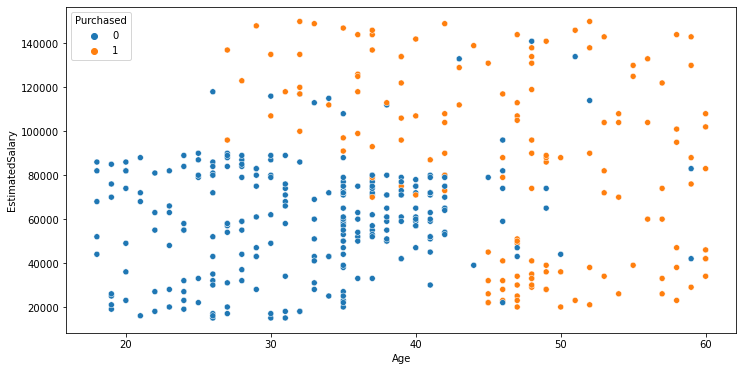

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.scatterplot(df['Age'],df['EstimatedSalary'], hue=df['Purchased'])

In [11]:
##Since we can see that the data is non linearly separable hence using SVM

In [12]:
x = df.iloc[:,1:4]
y = df.iloc[:,4]

In [13]:
## for standardization


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1, stratify = y)

In [16]:
#pip install sklearn

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
from sklearn.svm import SVC
svm_model = SVC()

In [31]:
svm_model.fit(x_train, y_train)

SVC()

In [32]:
##Testing accuracy

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
y_pred = svm_model.predict(x_test)

cm = confusion_matrix(y_pred, y_test)
print("confusion_matrix :\n ", cm)

clls = classification_report(y_pred, y_test)
print("Classification_Report :\n ", clls)

confusion_matrix :
  [[58  4]
 [ 6 32]]
Classification_Report :
                precision    recall  f1-score   support

           0       0.91      0.94      0.92        62
           1       0.89      0.84      0.86        38

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



In [35]:
y_pred_train = svm_model.predict(x_train)

cm = confusion_matrix(y_pred_train, y_train)
print("confusion_matrix :\n ", cm)

clls = classification_report(y_pred_train, y_train)
print("Classification_Report :\n ", clls)

confusion_matrix :
  [[176  10]
 [ 17  97]]
Classification_Report :
                precision    recall  f1-score   support

           0       0.91      0.95      0.93       186
           1       0.91      0.85      0.88       114

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



In [36]:
##So we can see after scaling out model accuracy goes to 90 and 91 percentages..

HYPERPARAMETER TUNING

In SVM we have three hyperparameters as C value gamma value and the kernel...

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [43]:
svc_model = SVC()
hyp = {'C':np.arange(0.1,2,0.1),
       'kernel':['rbf','poly','sigmoid','linear'],
      'gamma':np.arange(0.1,1,0.1)}

gscv_svc_model = GridSearchCV(svc_model, hyp, cv=5)
gscv_svc_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [44]:
gscv_svc_model.best_params_

{'C': 0.4, 'gamma': 0.6, 'kernel': 'rbf'}

In [45]:
gscv_svc_model.best_estimator_

SVC(C=0.4, gamma=0.6)

In [47]:
svc_model = SVC(C= 0.4, gamma= 0.6, kernel= 'rbf')

In [50]:
svc_model.fit(x_train, y_train)

In [51]:
y_pred_new = svc_model.predict(x_test)

In [52]:
accuracy = accuracy_score(y_pred_new, y_test)

In [53]:
accuracy

0.9